# House Loan Forecasting System

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train=pd.read_csv("train.csv")
train['LoanAmount']=train['LoanAmount']*1000
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128000.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66000.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120000.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141000.0,360.0,1.0,Urban,Y


In [3]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146412.162162,342.00000,0.842199
std,6109.041673,2926.248369,85587.325236,65.12041,0.364878
min,150.000000,0.000000,9000.000000,12.00000,0.000000
25%,2877.500000,0.000000,100000.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128000.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168000.000000,360.00000,1.000000
max,81000.000000,41667.000000,700000.000000,480.00000,1.000000


In [4]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train.duplicated().sum()

0

### EDA

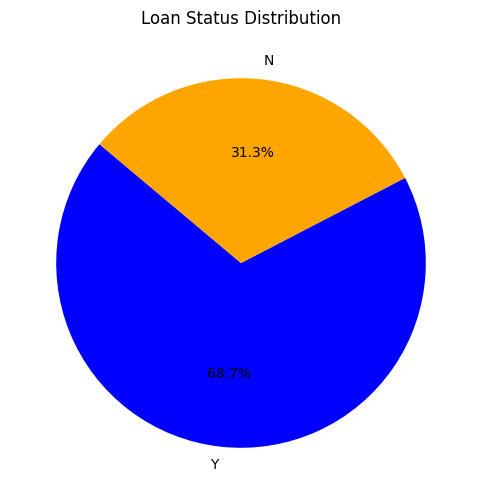

In [7]:
value_counts = train['Loan_Status'].value_counts()

# Calculate percentages
percentages = value_counts / value_counts.sum() * 100
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'], startangle=140)
plt.title('Loan Status Distribution')
plt.show()

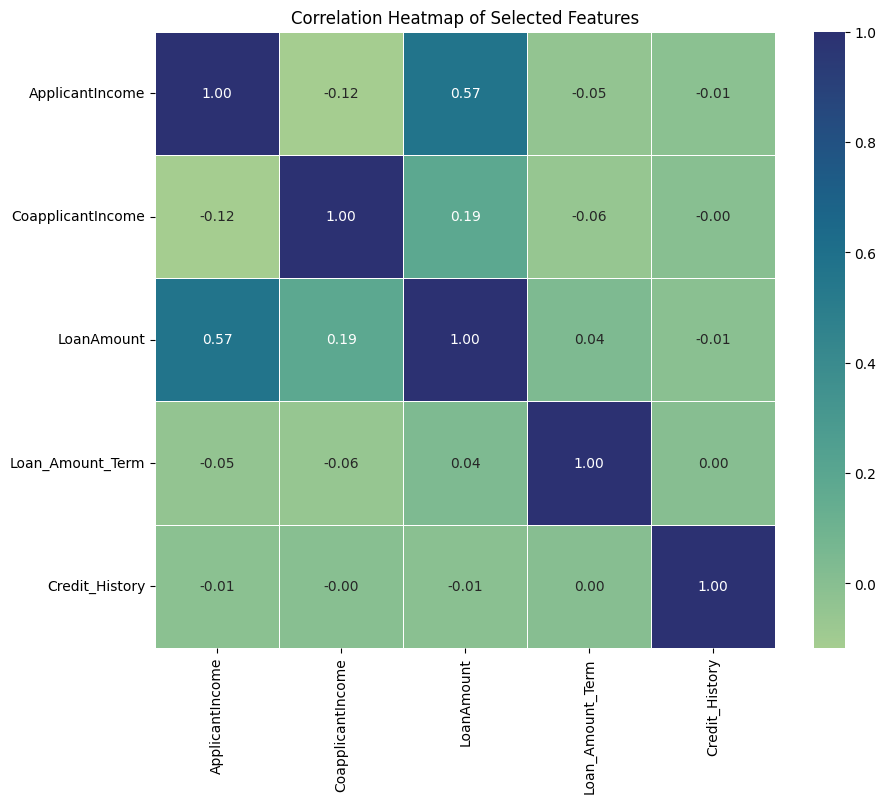

In [8]:
cols_to_correlate = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']

# Compute the correlation matrix
corr_matrix = train[cols_to_correlate].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data=corr_matrix, annot=True, cmap='crest', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Features')
plt.show()

In [9]:
cat_fea=[i for i in train.columns if len(train[i].unique())<15]
cat_fea

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

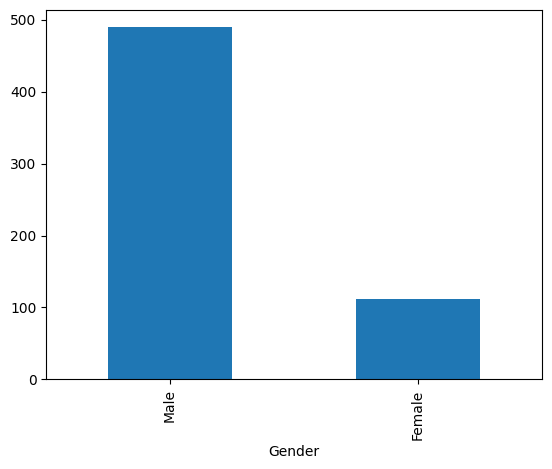

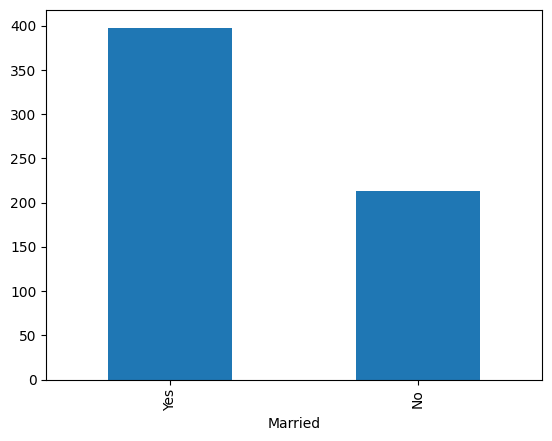

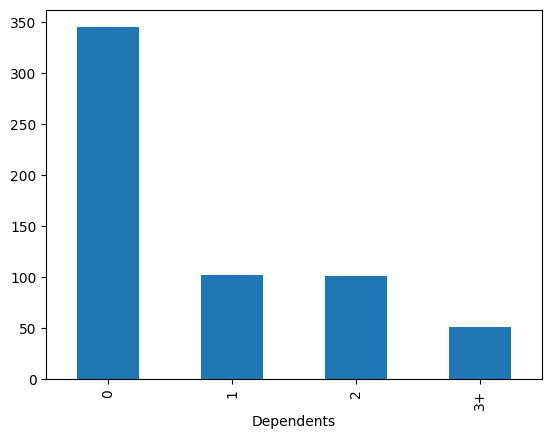

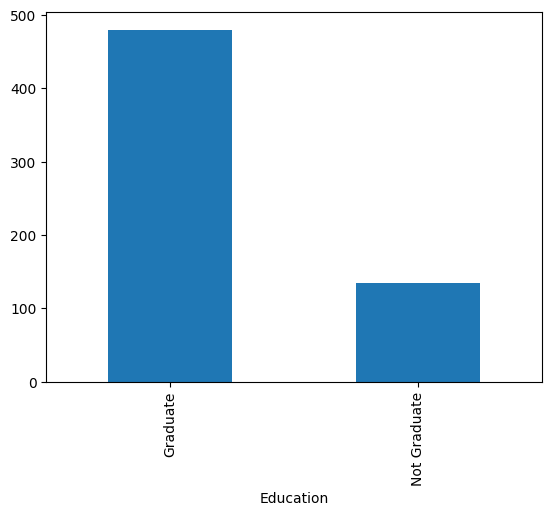

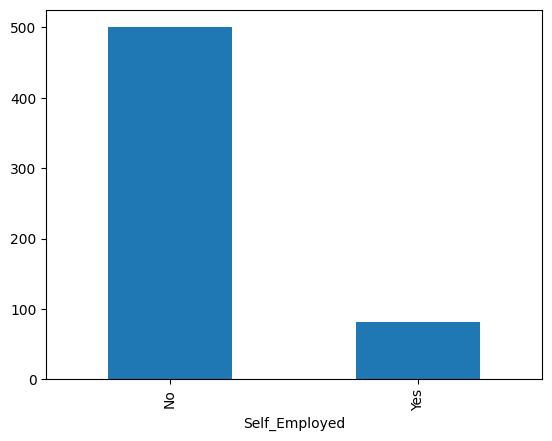

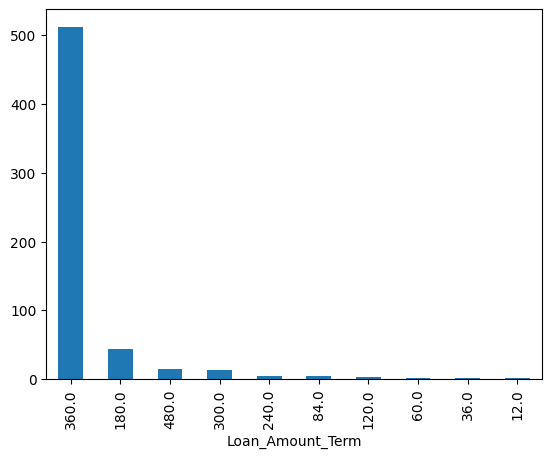

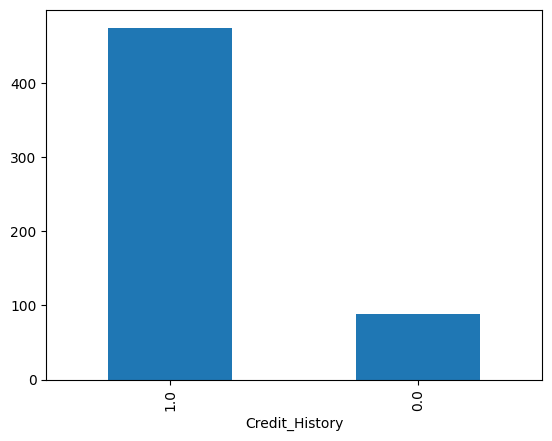

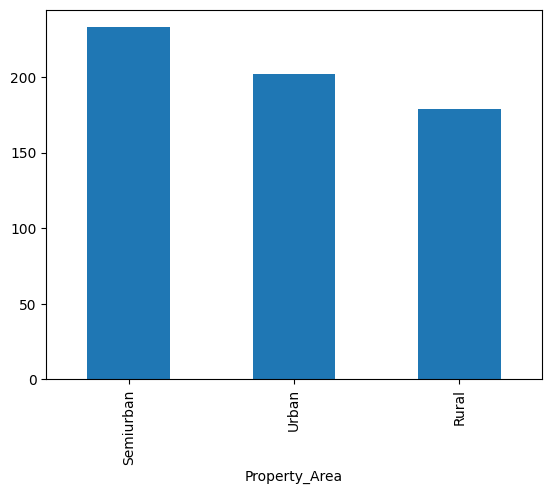

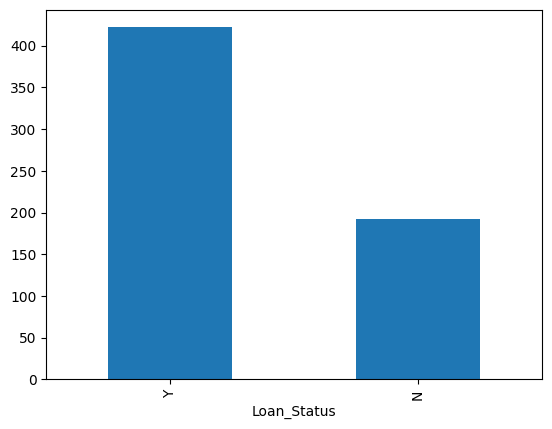

In [10]:
for cat in cat_fea:
    train[cat].value_counts().plot(kind='bar')
    plt.xlabel(cat)
    plt.show()

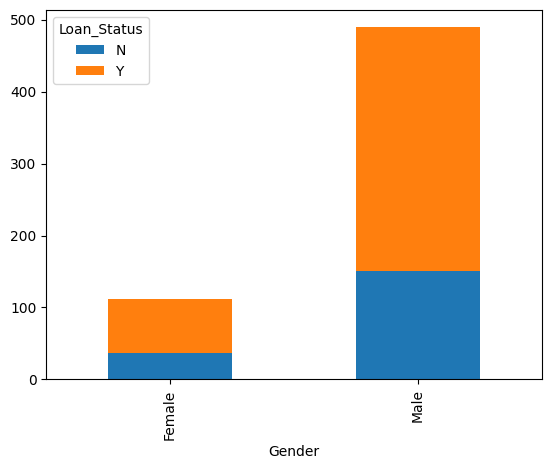

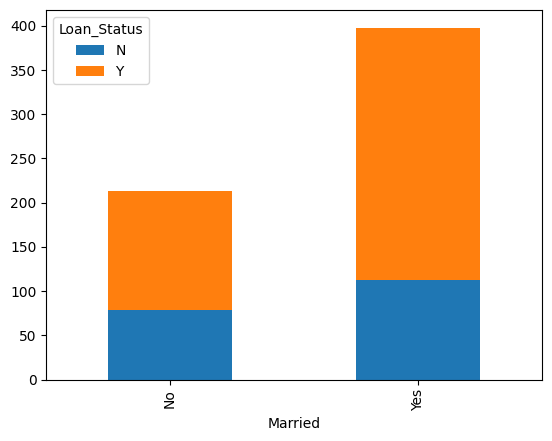

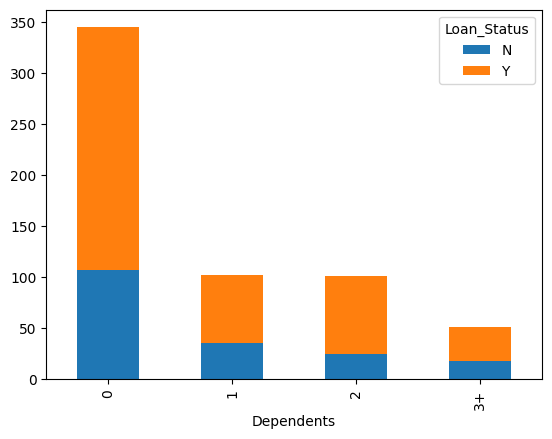

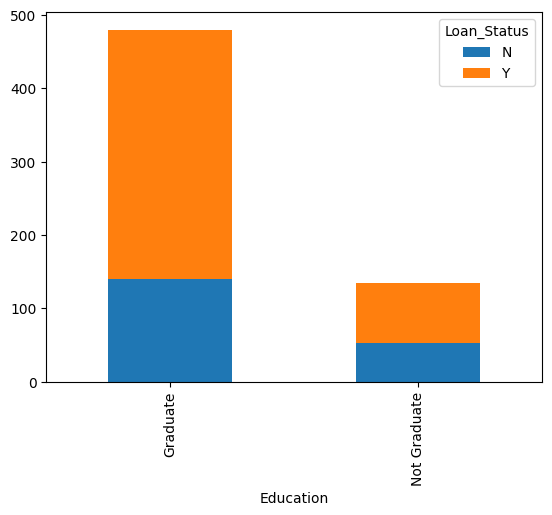

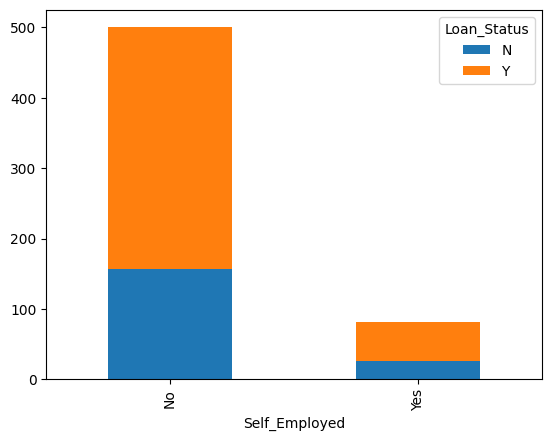

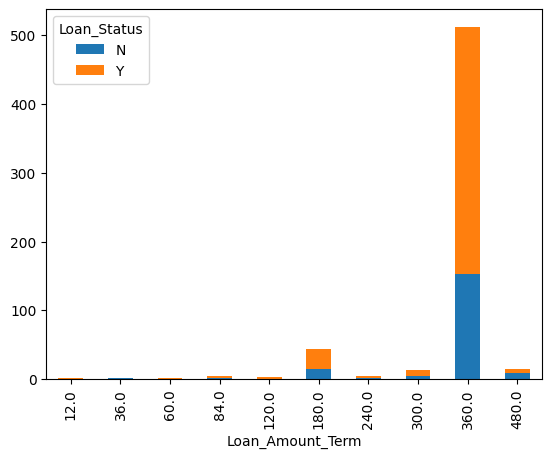

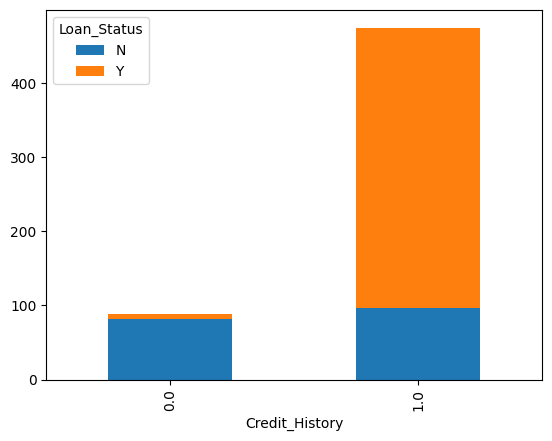

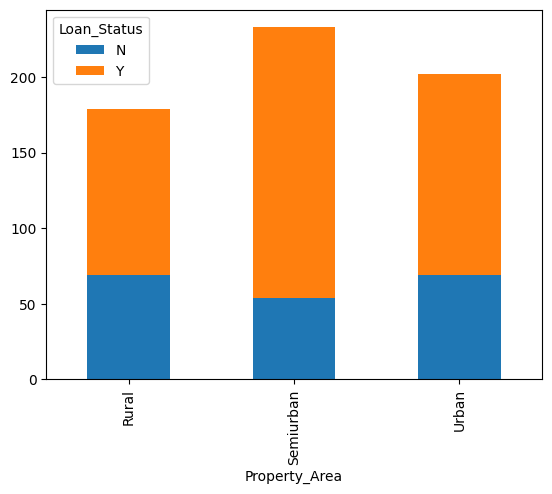

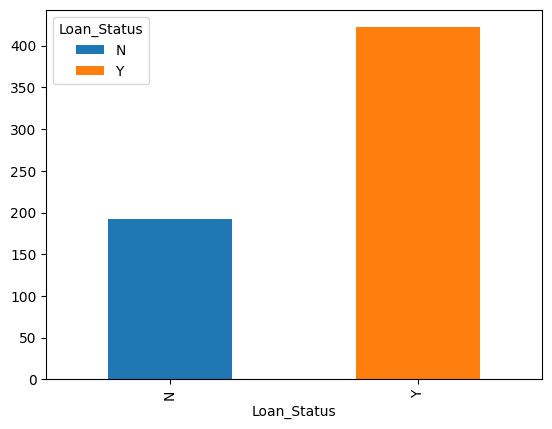

In [11]:
for c in cat_fea:
    a=pd.crosstab(train[c],train['Loan_Status'])
    a.plot(kind='bar',stacked=True)
    plt.show();

- Gender vs Loan Status: Male applicants have a slightly higher proportion of approved loans compared to female applicants.
- Marital Status vs Loan Status: Married applicants have a higher proportion of approved loans than unmarried applicants.
- Dependents vs Loan Status: Applicants with 0 dependents have a higher proportion of approved loans, while those with 1 or 3+ dependents have similar proportions across both loan statuses.
- Education vs Loan Status: Graduates have a higher proportion of approved loans compared to non-graduates.
- Employment Status vs Loan Status: Both unemployed and employed applicants have higher proportions of approved loans, with no significant difference based on self-employment status.
- Credit History vs Loan Status: Applicants with a credit history score of 1 are more likely to have their loans approved.
- Property Area vs Loan Status: Loans are more likely to be approved for applicants from semi-urban areas compared to those from rural and urban areas.n area

In [12]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

- As there is no stong correlation of these variables with any other variable so i decided to fill missing values either by their median value or mode value

### Missing Values


In [13]:
train['Dependents'].replace('3+','3',inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna('0',inplace=True)

#
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

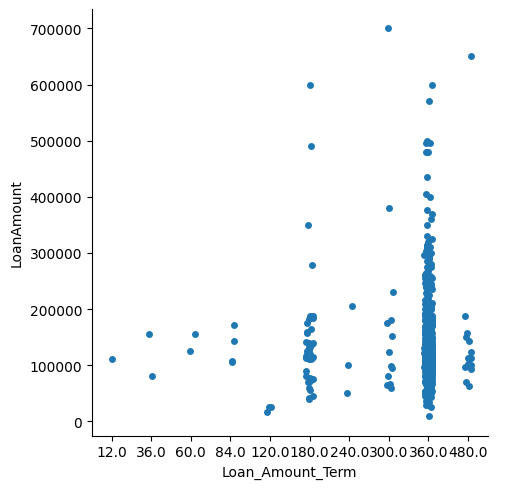

In [14]:
sns.catplot(x='Loan_Amount_Term',y='LoanAmount',data=train)

In [15]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

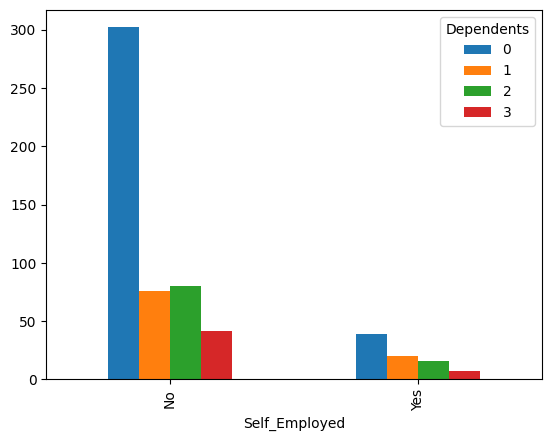

In [16]:
a=pd.crosstab(train['Self_Employed'],train['Dependents'])
a.plot(kind='bar')
plt.show()

From the bar plot of dependents vs self-employment status, it is observed that if there are 0 dependents, around 270 out of 345 are not self-employed. Having 0 dependents suggests that no one relies on the applicant's income, possibly indicating that the applicant is still studying. Given that 90% of the values for self-employment status are 'No', we will fill the missing values with 'No'. no.

In [17]:
train['Self_Employed'].fillna('No',inplace=True)

I decided to fill missing values of credit history with 2 since null values in credit history signifies that applicant had not borrowd any loan previously

In [18]:
train['Credit_History'].fillna(2,inplace=True)

We shall fill missing values of Credit_History with 2 , since : -

0 stands for applicants who took a Loan in the past but could not repay the Loan , due to different factors

1 stands for applicants who took a Loan in the past and have repayed the Loan generously

2 stands for applicants who are basically , the First Timers (Never - ever took a Loan)

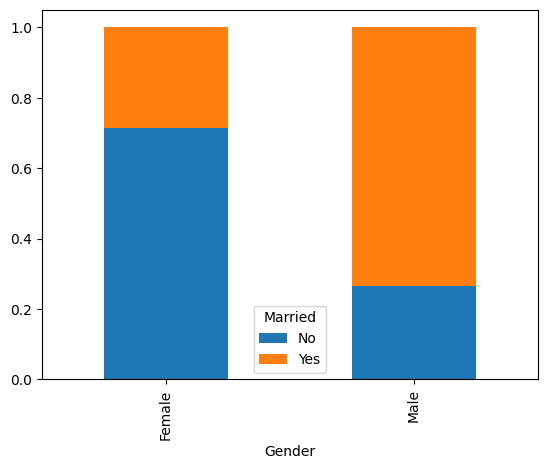

In [19]:
a=pd.crosstab(train['Gender'],train['Married'])
a.div(a.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.show()

In [20]:
dict={'Yes':'Male','No':'Female'}
train['Gender'].fillna(train['Married'].map(dict),inplace=True)

In [21]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

After analyzing categorical features now we will look at our continuous variable and plot their histogram and boxplot to check the skewness and to identify the outliers present in our continuous variable

### Histograms

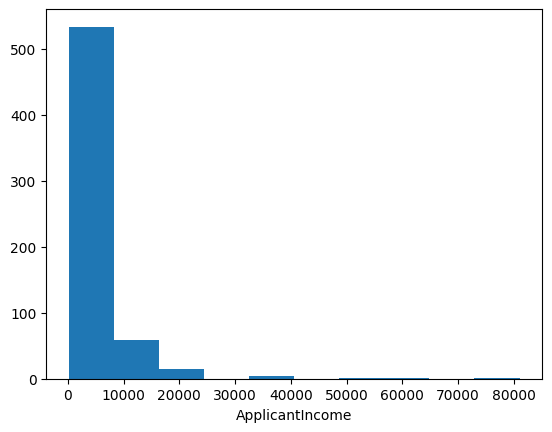

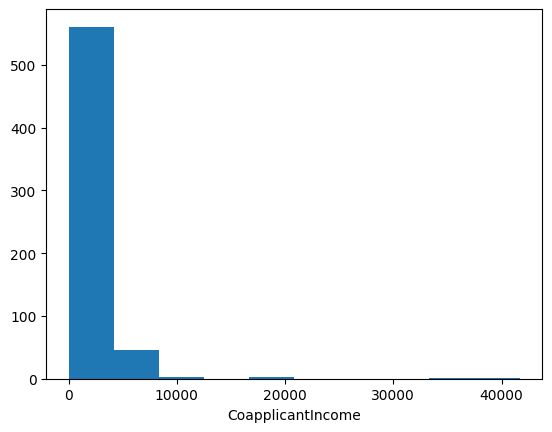

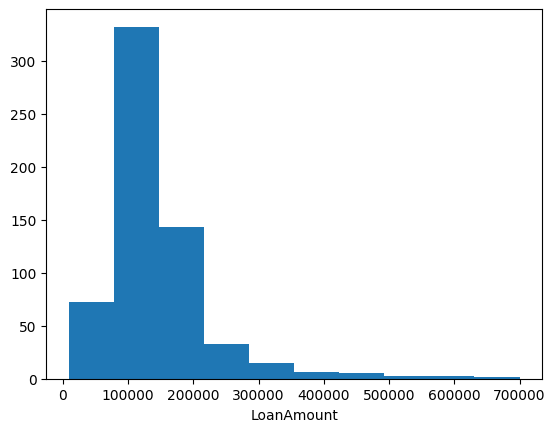

In [22]:
features=['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in features:
    plt.hist(train[i],bins=10)
    plt.xlabel(i)
    plt.show()

In [23]:
train['log_appincome']=np.log(train['ApplicantIncome'])
train['sqrt_coappincome']=np.sqrt(train['CoapplicantIncome'])

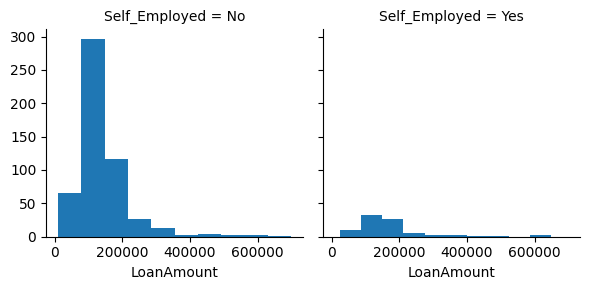

In [24]:
g=sns.FacetGrid(train,col='Self_Employed')
g.map(plt.hist,'LoanAmount',bins=10)


### Boxplots and Outlier Removal

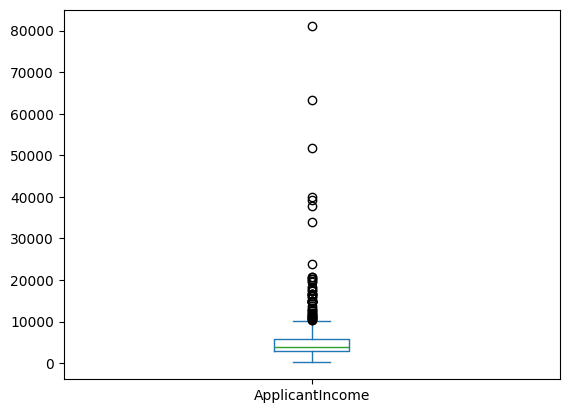

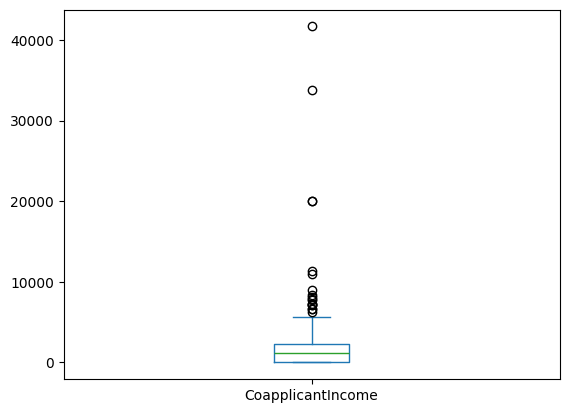

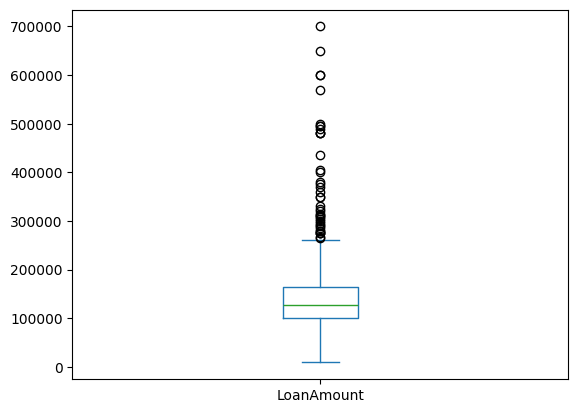

In [25]:
feature=['ApplicantIncome','CoapplicantIncome','LoanAmount']
for i in feature:
    plt.figure()
    train[i].plot(kind='box')
    plt.show()

<Axes: xlabel='Education', ylabel='ApplicantIncome'>

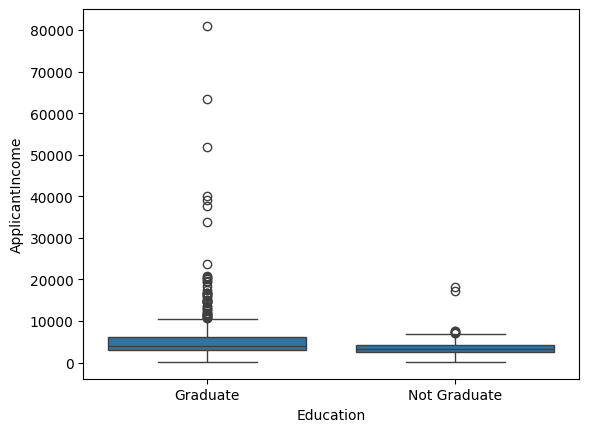

In [26]:
def boxplot(feature,basis):
    return sns.boxplot(x=train[feature],y=train[basis])
boxplot('Education','ApplicantIncome')

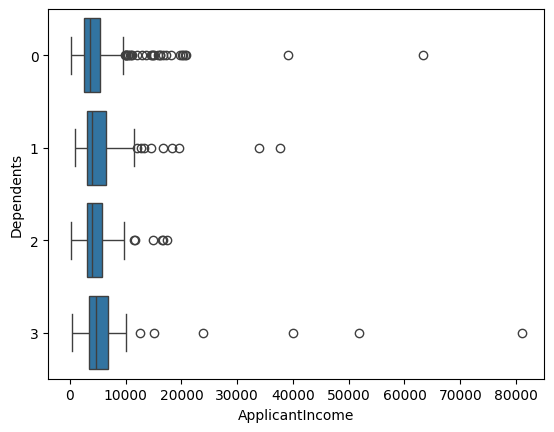

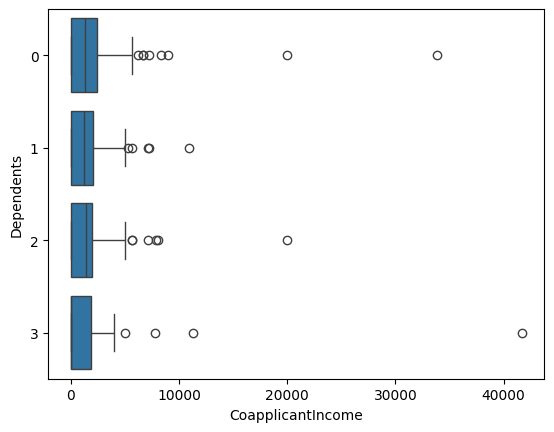

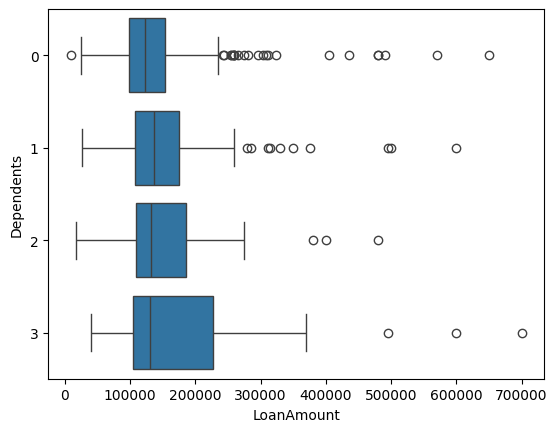

In [27]:
feature = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

def plot_graph(x_axis_feature, type_of_graph, hue=None):
    for i in feature:
        if type_of_graph == 'boxplot':
            sns.boxplot(x=i, y=x_axis_feature, hue=hue, data=train)
            plt.show()
        elif type_of_graph == 'barplot':
            sns.barplot(x=i, y=x_axis_feature, data=train)
            plt.show()
        elif type_of_graph == 'catplot':
            sns.catplot(x=i, y=x_axis_feature, hue=hue, data=train)
            plt.show()

plot_graph('Dependents', 'boxplot')

In [28]:
#Removing outliers with the help of z score

def remove_outlier(column):
    std=np.std(train[column])
    mean=np.mean(train[column])
    outlier=[]
    for i in train[column]:
        zscore=(i-mean)/std
        
        #Considering z>3 because z>3 sinifies 99.7%values fall in that region
        
        if(zscore>3):
            outlier.append(i)
            minimum=np.min(outlier)
    return minimum

In [29]:
print(remove_outlier('ApplicantIncome'))
print(remove_outlier('CoapplicantIncome'))
print(remove_outlier('LoanAmount'))

23803
10968.0
400000.0


In [30]:
train['ApplicantIncome']=train['ApplicantIncome'].where(train['ApplicantIncome']<23803,train['ApplicantIncome'].median())
train['CoapplicantIncome']=train['CoapplicantIncome'].where(train['CoapplicantIncome']<10968,train['CoapplicantIncome'].median())
train['LoanAmount']=train['LoanAmount'].where(train['LoanAmount']<400000,train['LoanAmount'].median())

In [31]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_appincome,sqrt_coappincome
count,614.000000,614.00000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,4849.527687,1408.47544,136205.211726,342.410423,0.936482,8.341213,28.006444
std,3369.960378,1677.16081,58406.129191,64.428629,0.471924,0.645263,28.952550
min,150.000000,0.00000,9000.000000,12.000000,0.000000,5.010635,0.000000
25%,2877.500000,0.00000,100250.000000,360.000000,1.000000,7.964677,0.000000
50%,3812.250000,1177.75000,128000.000000,360.000000,1.000000,8.246040,34.473218
75%,5690.500000,2250.00000,160000.000000,360.000000,1.000000,8.664750,47.929559
max,20833.000000,8980.00000,380000.000000,480.000000,2.000000,11.302204,204.124962


### Feature Engineering


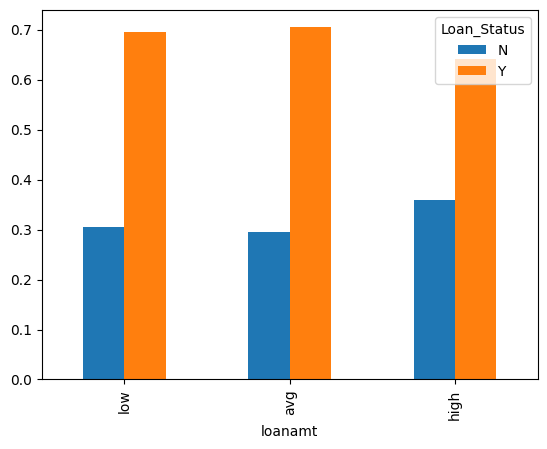

In [32]:
train['loanamt']=pd.cut(train['LoanAmount'],bins=[8999,100250,160000,380001],labels=['low','avg','high'])
a=pd.crosstab(train['loanamt'],train['Loan_Status'])
a.div(a.sum(1),axis=0).plot(kind='bar')
plt.show()

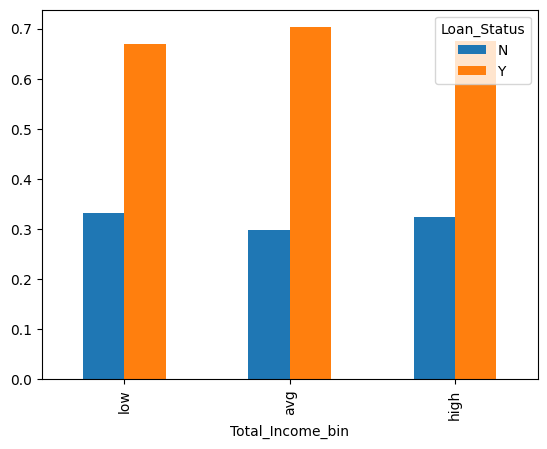

In [33]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins=[1441,3997.5,7165,27501],labels=['low','avg','high'])
a=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
a.div(a.sum(1),axis=0).plot(kind='bar')
plt.show()

In [34]:
def set_scr(train):
    if train["Total_Income_bin"] == "low" and train["loanamt"] == "high":
        return 1
    elif train["Total_Income_bin"] == "avg" and train["loanamt"] == "high":
        return 2
    elif train["Total_Income_bin"] == "low" and train["loanamt"] == "avg":
        return 4
    elif train["Total_Income_bin"] == "high" and train["loanamt"] == "high":
        return 8
    elif train["Total_Income_bin"] == "avg" and train["loanamt"] == "avg":
        return 7
    elif train["Total_Income_bin"] == "low" and train["loanamt"] == "low":
        return 3
    elif train["Total_Income_bin"] == "high" and train["loanamt"] == "avg":
        return 6
    elif train["Total_Income_bin"] == "avg" and train["loanamt"] == "low":
        return 5
    else :
        return 9
train['score']=train.apply(set_scr,axis=1)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_appincome,sqrt_coappincome,loanamt,Total_Income,Total_Income_bin,score
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,128000.0,360.0,1.0,Urban,Y,8.674026,0.000000,avg,5849.0,avg,7
1,LP001003,Male,Yes,1,Graduate,No,4583.0,1508.0,128000.0,360.0,1.0,Rural,N,8.430109,38.832976,avg,6091.0,avg,7
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000.0,360.0,1.0,Urban,Y,8.006368,0.000000,low,3000.0,low,3
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000.0,360.0,1.0,Urban,Y,7.856707,48.559242,avg,4941.0,avg,7
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141000.0,360.0,1.0,Urban,Y,8.699515,0.000000,avg,6000.0,avg,7


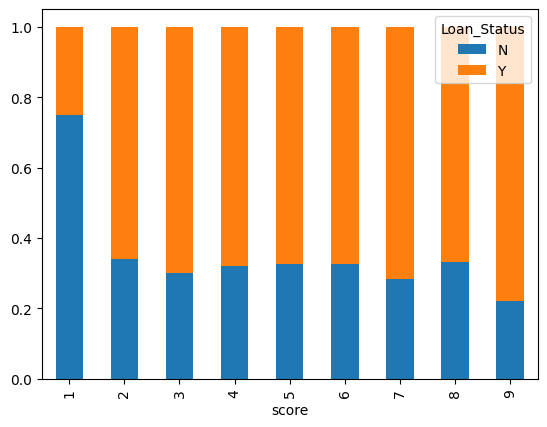

In [35]:
a=pd.crosstab(train['score'],train['Loan_Status'])
a.div(a.sum(1),axis=0).plot(kind='bar',stacked=True)
plt.show()

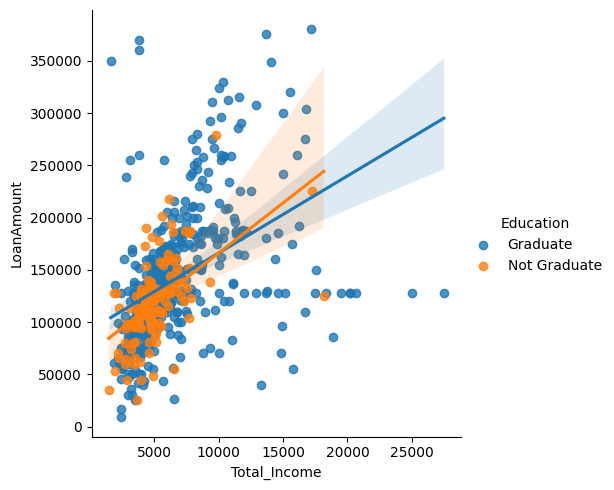

In [36]:
sns.lmplot(x='Total_Income',y='LoanAmount',data=train,hue='Education')

In [37]:
#I've calculated EMI that every person will pa eah and every month
train['EMI']=(train['LoanAmount']*(7.85/1200)*((1+(7.85/1200))**train['Loan_Amount_Term']))/((1+(7.85/1200))**(train['Loan_Amount_Term']-1))
#Now we will calculate Risk factor
train['Risk_Percent']=(train['EMI']/train['ApplicantIncome'])

<Axes: xlabel='Loan_Status', ylabel='Risk_Percent'>

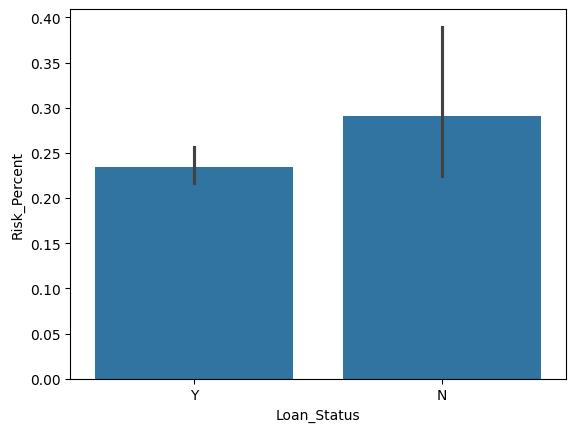

In [38]:
sns.barplot(x='Loan_Status',y='Risk_Percent',data=train)

- Above graph clearly signifies that there is high risk percent for loan status of no.
- So if there is high risk percent chances of loan approval is low

In [39]:
train['Risk_Percent_bin']=pd.cut(train['Risk_Percent'],bins=[0.019859,0.153936,0.204763,0.281542,5.926015],labels=[0,1,2,3])

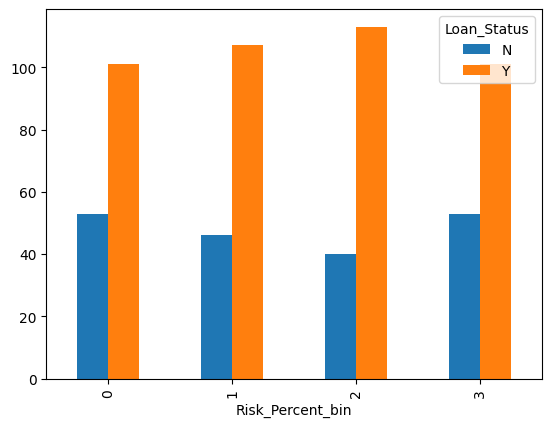

In [40]:
a=pd.crosstab(train['Risk_Percent_bin'],train['Loan_Status'])
a.plot(kind='bar')
plt.show()

- Creating risk percent bin didnt justify our main aim as for high risk there are more chances for approvd loans
- We have tried to make new columns which shows no of coapplicant based on coapplicant income

In [41]:
def num(train):
    if train['CoapplicantIncome']==0:
        return 0
    elif train['CoapplicantIncome']>=0 and train['CoapplicantIncome']<=2250:
        return 1
    elif train['CoapplicantIncome']>2250 and train['CoapplicantIncome']<=9000:
        return 2
train['coapplicant']=train.apply(num,axis=1)

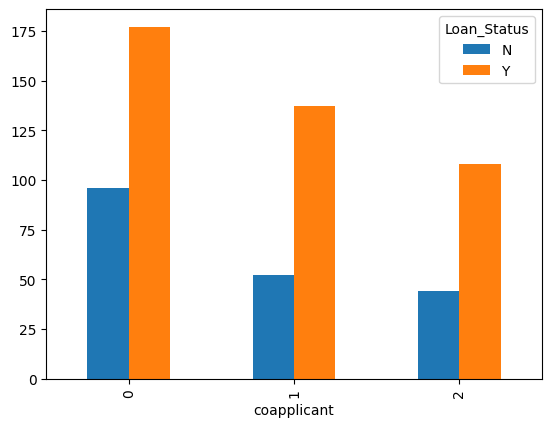

In [42]:
a=pd.crosstab(train['coapplicant'],train['Loan_Status'])
a.plot(kind='bar')
plt.show()

In [43]:
a

Loan_Status,N,Y
coapplicant,,
0,96,177
1,52,137
2,44,108


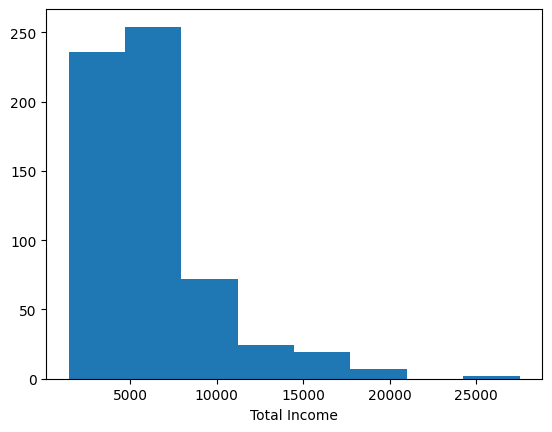

In [44]:
plt.hist(train['Total_Income'],bins=8)
plt.xlabel('Total Income')
plt.show()

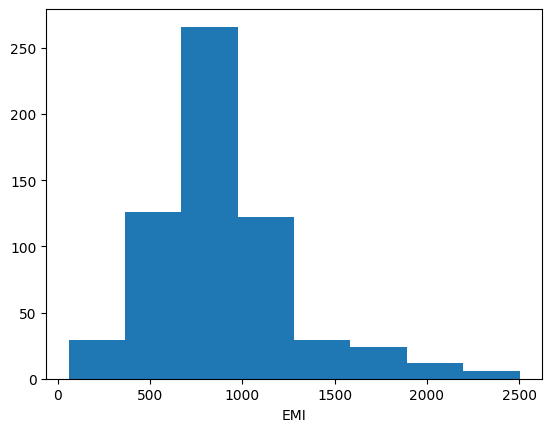

In [45]:
plt.hist(train['EMI'],bins=8)
plt.xlabel('EMI')
plt.show()

In [46]:
train['log_total_income']=np.log(train['Total_Income'])

In [47]:
# As there are 650 zero's in coapplicantincome and we have craeted a new column total income so we can drop coapplicant income
train=train.drop(['CoapplicantIncome'],axis=1)

### Label Encoding

In [48]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Loan_ID           614 non-null    object  
 1   Gender            614 non-null    object  
 2   Married           614 non-null    object  
 3   Dependents        614 non-null    object  
 4   Education         614 non-null    object  
 5   Self_Employed     614 non-null    object  
 6   ApplicantIncome   614 non-null    float64 
 7   LoanAmount        614 non-null    float64 
 8   Loan_Amount_Term  614 non-null    float64 
 9   Credit_History    614 non-null    float64 
 10  Property_Area     614 non-null    object  
 11  Loan_Status       614 non-null    object  
 12  log_appincome     614 non-null    float64 
 13  sqrt_coappincome  614 non-null    float64 
 14  loanamt           614 non-null    category
 15  Total_Income      614 non-null    float64 
 16  Total_Income_bin  614 non-

In [49]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
train['Gender']=le.fit_transform(train['Gender'])
train['Married']=le.fit_transform(train['Married'])

train['Self_Employed']=le.fit_transform(train['Self_Employed'])
train['Loan_Status']=le.fit_transform(train['Loan_Status'])
train['loanamt']=train['loanamt'].astype('object')
train['Total_Income_bin']=train['Total_Income_bin'].astype('object')
dict={'low':1,'avg':2,'high':3}
dict1={'low':1,'avg':2,'high':3}
dict2={'Graduate':1,'Not Graduate':0}
dict3={"Rural":0,'Urban':2,'Semiurban':1}
dict4={12:2,36:3,60:4,84:5,120:6,180:7,240:8,300:9,350:10,360:11,480:12}
train['Loan_Amount_Term']=train['Loan_Amount_Term'].map(dict4)
train['loanamt']=train['loanamt'].map(dict)
train['Education']=train['Education'].map(dict2)
train['Total_Income_bin']=train['Total_Income_bin'].map(dict1)
train['Property_Area']=train['Property_Area'].map(dict3)

In [50]:
pd.set_option('display.max_columns',None)
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,log_appincome,sqrt_coappincome,loanamt,Total_Income,Total_Income_bin,score,EMI,Risk_Percent,Risk_Percent_bin,coapplicant,log_total_income
0,LP001002,1,0,0,1,0,5849.0,128000.0,11,1.0,2,1,8.674026,0.000000,2,5849.0,2,7,842.810889,0.144095,0,0,8.674026
1,LP001003,1,1,1,1,0,4583.0,128000.0,11,1.0,0,0,8.430109,38.832976,2,6091.0,2,7,842.810889,0.183899,1,1,8.714568
2,LP001005,1,1,0,1,1,3000.0,66000.0,11,1.0,2,1,8.006368,0.000000,1,3000.0,1,3,434.574365,0.144858,0,0,8.006368
3,LP001006,1,1,0,0,0,2583.0,120000.0,11,1.0,2,1,7.856707,48.559242,2,4941.0,2,7,790.135208,0.305898,3,2,8.505323
4,LP001008,1,0,0,1,0,6000.0,141000.0,11,1.0,2,1,8.699515,0.000000,2,6000.0,2,7,928.408870,0.154735,1,0,8.699515


### Model Training

In [51]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
       'Credit_History', 'Property_Area', 'Loan_Status', 'log_appincome',
       'sqrt_coappincome', 'loanamt', 'Total_Income', 'Total_Income_bin',
       'score', 'EMI', 'Risk_Percent', 'Risk_Percent_bin', 'coapplicant',
       'log_total_income'],
      dtype='object')

In [52]:
X=train[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount','Loan_Amount_Term',
     'Credit_History', 'Property_Area']]
y=train['Loan_Status']

In [53]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=31,test_size=0.2)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount','Loan_Amount_Term',
     'Credit_History', 'Property_Area']]=scaler.fit_transform(X_train[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount','Loan_Amount_Term',
     'Credit_History', 'Property_Area']])
X_test[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount','Loan_Amount_Term',
     'Credit_History', 'Property_Area']]=scaler.transform(X_test[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount','Loan_Amount_Term',
     'Credit_History', 'Property_Area']])

#### Logistic Regression

In [55]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have already split your data into X_train, X_test, y_train, y_test

# Initialize the Logistic Regression model
logistic_model = LogisticRegression()

# Fit the model to the training data
logistic_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8373983739837398
Confusion Matrix:
[[17 17]
 [ 3 86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.50      0.63        34
           1       0.83      0.97      0.90        89

    accuracy                           0.84       123
   macro avg       0.84      0.73      0.76       123
weighted avg       0.84      0.84      0.82       123



#### KNeighborsClassifier

In [56]:
# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_model = KNeighborsClassifier(n_neighbors=30)

# Fit the model to the training data
knn_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = knn_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.7804878048780488
Confusion Matrix:
[[ 7 27]
 [ 0 89]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.21      0.34        34
           1       0.77      1.00      0.87        89

    accuracy                           0.78       123
   macro avg       0.88      0.60      0.60       123
weighted avg       0.83      0.78      0.72       123



#### RandomForestClassifier

In [57]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest model
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8373983739837398
Confusion Matrix:
[[22 12]
 [ 8 81]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.65      0.69        34
           1       0.87      0.91      0.89        89

    accuracy                           0.84       123
   macro avg       0.80      0.78      0.79       123
weighted avg       0.83      0.84      0.83       123



#### DecisionTreeClassifier

In [58]:
# Import necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
decision_tree_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = decision_tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.7154471544715447
Confusion Matrix:
[[25  9]
 [26 63]]
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.74      0.59        34
           1       0.88      0.71      0.78        89

    accuracy                           0.72       123
   macro avg       0.68      0.72      0.69       123
weighted avg       0.77      0.72      0.73       123



#### GradientBoostingClassifier

In [59]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Gradient Boosting model
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gradient_boosting_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = gradient_boosting_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8211382113821138
Confusion Matrix:
[[19 15]
 [ 7 82]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.56      0.63        34
           1       0.85      0.92      0.88        89

    accuracy                           0.82       123
   macro avg       0.79      0.74      0.76       123
weighted avg       0.81      0.82      0.81       123



#### AdaBoostClassifier

In [60]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the AdaBoost model
adaboost_model = AdaBoostClassifier(random_state=0,algorithm='SAMME',n_estimators=1000,learning_rate=0.1)

# Fit the model to the training data
adaboost_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = adaboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8455284552845529
Confusion Matrix:
[[16 18]
 [ 1 88]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.47      0.63        34
           1       0.83      0.99      0.90        89

    accuracy                           0.85       123
   macro avg       0.89      0.73      0.77       123
weighted avg       0.86      0.85      0.83       123



#### Support Vector Machine

In [61]:
# Import necessary libraries
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the SVM model
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model to the training data
svm_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.8536585365853658
Confusion Matrix:
[[16 18]
 [ 0 89]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        34
           1       0.83      1.00      0.91        89

    accuracy                           0.85       123
   macro avg       0.92      0.74      0.77       123
weighted avg       0.88      0.85      0.83       123



#### Naive Bayes

In [62]:
# Import necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Gaussian Naive Bayes model
naive_bayes_model = GaussianNB()

# Fit the model to the training data
naive_bayes_model.fit(X_train, y_train)

# Predict the target variable for the test data
y_pred = naive_bayes_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.7804878048780488
Confusion Matrix:
[[18 16]
 [11 78]]
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.53      0.57        34
           1       0.83      0.88      0.85        89

    accuracy                           0.78       123
   macro avg       0.73      0.70      0.71       123
weighted avg       0.77      0.78      0.77       123



### Test Data Set

In [63]:
test=pd.read_csv('test.csv')
test['LoanAmount']=test['LoanAmount']*1000
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110000.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126000.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208000.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100000.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78000.0,360.0,1.0,Urban


In [64]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [65]:
dict={'Yes':'Male','No':'Female'}
test['Gender'].fillna(test['Married'].map(dict),inplace=True)

In [66]:
test['Credit_History'].fillna(2,inplace=True)

In [67]:
test['Self_Employed'].fillna('No',inplace=True)

In [68]:
test['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].fillna('0',inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(),inplace=True)

In [69]:
test['ApplicantIncome']=test['ApplicantIncome'].where(test['ApplicantIncome']>0,test['ApplicantIncome'].mean())

In [70]:
test['log_appincome']=np.log(test['ApplicantIncome'])
test['sqrt_coappincome']=np.sqrt(test['CoapplicantIncome'])

In [71]:
test['loanamt']=pd.cut(test['LoanAmount'],bins=[27000,101000,157500,560000],labels=['low','avg','high'])

In [72]:
test['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']
test['Total_Income_bin']=pd.cut(test['Total_Income'],bins=[2082,4161.5,6980,72530],labels=['low','avg','high'])
test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,log_appincome,sqrt_coappincome,Total_Income
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,4831.788008,1569.577657,135980.926431,342.822888,0.918256,8.294887,28.206995,6401.365665
std,4897.749261,2334.232099,60959.739166,64.658402,0.483463,0.547110,27.857812,5244.153719
min,570.000000,0.000000,28000.000000,6.000000,0.000000,6.345636,0.000000,2083.000000
25%,2885.500000,0.000000,101000.000000,360.000000,1.000000,7.967447,0.000000,4161.500000
50%,3808.000000,1025.000000,125000.000000,360.000000,1.000000,8.244859,32.015621,5225.000000
75%,5060.000000,2430.500000,157500.000000,360.000000,1.000000,8.529122,49.299911,6980.000000
max,72529.000000,24000.000000,550000.000000,480.000000,2.000000,11.191742,154.919334,72529.000000


In [73]:
def set_scr(test):
    if test["Total_Income_bin"] == "low" and test["loanamt"] == "high":
        return 1
    elif test["Total_Income_bin"] == "avg" and test["loanamt"] == "high":
        return 2
    elif test["Total_Income_bin"] == "low" and test["loanamt"] == "avg":
        return 4
    elif test["Total_Income_bin"] == "high" and test["loanamt"] == "high":
        return 8
    elif test["Total_Income_bin"] == "avg" and test["loanamt"] == "avg":
        return 7
    elif test["Total_Income_bin"] == "low" and test["loanamt"] == "low":
        return 3
    elif test["Total_Income_bin"] == "high" and test["loanamt"] == "avg":
        return 6
    elif test["Total_Income_bin"] == "avg" and test["loanamt"] == "low":
        return 5
    else :
        return 9
test['score']=test.apply(set_scr,axis=1)
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,log_appincome,sqrt_coappincome,loanamt,Total_Income,Total_Income_bin,score
0,LP001015,Male,Yes,0,Graduate,No,5720.0,0,110000.0,360.0,1.0,Urban,8.651724,0.000000,avg,5720.0,avg,7
1,LP001022,Male,Yes,1,Graduate,No,3076.0,1500,126000.0,360.0,1.0,Urban,8.031385,38.729833,avg,4576.0,avg,7
2,LP001031,Male,Yes,2,Graduate,No,5000.0,1800,208000.0,360.0,1.0,Urban,8.517193,42.426407,high,6800.0,avg,2
3,LP001035,Male,Yes,2,Graduate,No,2340.0,2546,100000.0,360.0,2.0,Urban,7.757906,50.457903,low,4886.0,avg,5
4,LP001051,Male,No,0,Not Graduate,No,3276.0,0,78000.0,360.0,1.0,Urban,8.094378,0.000000,low,3276.0,low,3


In [74]:
test['EMI']=(test['LoanAmount']*(7.85/1200)*((1+(7.85/1200))**test['Loan_Amount_Term']))/((1+(7.85/1200))**(test['Loan_Amount_Term']-1))
test['Risk_Percent']=(test['EMI']/test['ApplicantIncome'])

In [75]:
def num(test):
    if test['CoapplicantIncome']==0:
        return 0
    elif test['CoapplicantIncome']>=0 and test['CoapplicantIncome']<=1025:
        return 1
    elif test['CoapplicantIncome']>1025 and test['CoapplicantIncome']<=2430.5:
        return 1
    elif test['CoapplicantIncome']>2430.5 and test['CoapplicantIncome']<=25000:
        return 2
test['coapplicant']=test.apply(num,axis=1)

In [76]:
test['log_total_income']=np.log(test['Total_Income'])

In [77]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dict5={'Male':1,'Female':0}
test['Gender']=test['Gender'].map(dict5)
test['Married']=le.fit_transform(test['Married'])
dict6={'Yes':1,'No':0}
test['Self_Employed']=test['Self_Employed'].map(dict6)
test['loanamt']=test['loanamt'].astype('object')
test['Total_Income_bin']=test['Total_Income_bin'].astype('object')
dict={'low':1,'avg':2,'high':3}
dict1={'low':1,'avg':2,'high':3}
dict2={'Graduate':1,'Not Graduate':0}
dict3={"Rural":0,'Urban':2,'Semiurban':1}
dict4={6:0,8:1,12:2,36:3,60:4,84:5,120:6,180:7,240:8,300:9,350:10,360:11,480:12}
test['Loan_Amount_Term']=test['Loan_Amount_Term'].map(dict4)
test['loanamt']=test['loanamt'].map(dict)
test['Education']=test['Education'].map(dict2)
test['Total_Income_bin']=test['Total_Income_bin'].map(dict1)
test['Property_Area']=test['Property_Area'].map(dict3)

In [78]:
test.describe()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,log_appincome,sqrt_coappincome,loanamt,Total_Income,Total_Income_bin,score,EMI,Risk_Percent,coapplicant,log_total_income
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.787466,0.634877,0.771117,0.100817,4831.788008,1569.577657,135980.926431,10.550409,0.918256,1.079019,8.294887,28.206995,1.997275,6401.365665,2.000000,5.572207,895.360980,0.233344,0.825613,8.621348
std,0.409659,0.482122,0.420687,0.301498,4897.749261,2334.232099,60959.739166,1.477349,0.483463,0.824337,0.547110,27.857812,0.710955,5244.153719,0.709036,2.092033,401.386968,0.139704,0.804426,0.473654
min,0.000000,0.000000,0.000000,0.000000,570.000000,0.000000,28000.000000,0.000000,0.000000,0.000000,6.345636,0.000000,1.000000,2083.000000,1.000000,1.000000,184.364882,0.016461,0.000000,7.641564
25%,1.000000,0.000000,1.000000,0.000000,2885.500000,0.000000,101000.000000,11.000000,1.000000,0.000000,7.967447,0.000000,1.000000,4161.500000,1.500000,4.000000,665.030467,0.158027,0.000000,8.333630
50%,1.000000,1.000000,1.000000,0.000000,3808.000000,1025.000000,125000.000000,11.000000,1.000000,1.000000,8.244859,32.015621,2.000000,5225.000000,2.000000,6.000000,823.057509,0.204019,1.000000,8.561210
75%,1.000000,1.000000,1.000000,0.000000,5060.000000,2430.500000,157500.000000,11.000000,1.000000,2.000000,8.529122,49.299911,2.500000,6980.000000,2.500000,7.000000,1037.052461,0.286618,1.500000,8.850789
max,1.000000,1.000000,1.000000,1.000000,72529.000000,24000.000000,550000.000000,12.000000,2.000000,2.000000,11.191742,154.919334,3.000000,72529.000000,3.000000,9.000000,3621.453038,1.937141,2.000000,11.191742


In [79]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
train[['ApplicantIncome','LoanAmount','Total_Income','EMI','log_appincome','Risk_Percent','log_total_income','sqrt_coappincome']]=scaler.fit_transform(train[['ApplicantIncome','LoanAmount','Total_Income','EMI','log_appincome','Risk_Percent','log_total_income','sqrt_coappincome']])

In [80]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
test[['ApplicantIncome','LoanAmount','EMI','Total_Income','log_appincome','Risk_Percent','log_total_income','sqrt_coappincome']]=scaler.fit_transform(test[['ApplicantIncome','LoanAmount','EMI','Total_Income','log_appincome','Risk_Percent','log_total_income','sqrt_coappincome']])

In [81]:
XX=test[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount','Loan_Amount_Term',
     'Credit_History', 'Property_Area']]
X1=train[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'LoanAmount','Loan_Amount_Term',
     'Credit_History', 'Property_Area']]
y1=train['Loan_Status']

In [82]:
XX.isnull().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
dtype: int64

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
import pandas as pd

# Initialize and train the Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=31)
gbc.fit(X1, y1)

# Predict the target variable for the test data
log_pred = gbc.predict(XX)

# Convert predictions to a DataFrame
log_pred = pd.DataFrame(log_pred, columns=['Loan_Status'], index=test.index)

# Merge the test DataFrame with the predictions
final = pd.merge(test, log_pred, left_index=True, right_index=True, how='outer')

# Display the first few rows of the merged DataFrame
final.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,log_appincome,sqrt_coappincome,loanamt,Total_Income,Total_Income_bin,score,EMI,Risk_Percent,coapplicant,log_total_income,Loan_Status
0,LP001015,1,1,0,1,0,0.181599,0,-0.426780,11,1.0,2,0.653111,-1.013917,2,-0.130106,2,7,-0.426780,-0.764938,0,0.064219,1
1,LP001022,1,1,1,1,0,-0.358978,1500,-0.163953,11,1.0,2,-0.482283,0.378250,2,-0.348551,2,7,-0.163953,0.260697,1,-0.407535,1
2,LP001031,1,1,2,1,0,0.034392,1800,1.183033,11,1.0,2,0.406882,0.511125,3,0.076119,2,2,1.183033,0.290795,1,0.429865,1
3,LP001035,1,1,2,1,0,-0.509456,2546,-0.591047,11,2.0,2,-0.982826,0.799822,1,-0.289357,2,5,-0.591047,0.344364,2,-0.268957,1
4,LP001051,1,0,0,0,0,-0.318087,0,-0.952433,11,1.0,2,-0.366988,-1.013917,1,-0.596785,1,3,-0.952433,-0.548840,0,-1.114081,1


In [84]:
final=final[['Loan_ID','Loan_Status']]
final['Loan_Status'].replace(1,'Y',inplace=True)
final['Loan_Status'].replace(0,'N',inplace=True)
final['Loan_Status'].value_counts()

Loan_Status
Y    290
N     77
Name: count, dtype: int64

In [85]:
final.to_csv('final.csv')